In [1]:
pip install scikeras

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('MarketFarePredictionData.csv')
df

,MktCoupons,OriginCityMarketID,DestCityMarketID,OriginAirportID,DestAirportID,Carrier,NonStopMiles,RoundTrip,ODPairID,Pax,...,Circuity,Slot,Non_Stop,MktMilesFlown,OriginCityMarketID_freq,DestCityMarketID_freq,OriginAirportID_freq,DestAirportID_freq,Carrier_freq,ODPairID_freq
0,2,178,152,170,255,6,1807.0,1.0,4035,136.0,...,1.367460,0,0.0,1992.449761,0.004138,0.039783,0.004138,0.022049,0.116826,1.321716e-04
1,2,178,152,170,194,20,1798.0,1.0,4035,136.0,...,1.051724,0,0.0,1992.449761,0.004138,0.039783,0.004138,0.008368,0.307651,1.321716e-04
2,2,178,152,170,260,6,1784.0,0.0,4035,136.0,...,1.034753,0,0.0,1992.449761,0.004138,0.039783,0.004138,0.009366,0.116826,1.321716e-04
3,2,178,152,170,255,6,1807.0,1.0,4035,136.0,...,1.029884,0,0.0,1992.449761,0.004138,0.039783,0.004138,0.022049,0.116826,1.321716e-04
4,2,178,152,170,194,20,1798.0,1.0,4035,136.0,...,1.062291,0,0.0,1992.449761,0.004138,0.039783,0.004138,0.008368,0.307651,1.321716e-04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1581273,1,92,266,167,286,7,532.0,0.0,2422,2519.0,...,1.000000,0,1.0,532.000000,0.023245,0.001418,0.023245,0.001418,0.003414,3.161999e-06
1581274,1,92,266,167,286,7,532.0,1.0,2422,2519.0,...,1.000000,0,1.0,532.000000,0.023245,0.001418,0.023245,0.001418,0.003414,3.161999e-06
1581275,2,247,12,256,74,15,976.0,1.0,5170,3312.0,...,1.186475,0,0.0,1158.000000,0.000087,0.039433,0.000087,0.028036,0.056346,6.323999e-07
1581276,1,46,215,31,215,8,353.0,1.0,1283,2350.0,...,1.000000,0,1.0,353.000000,0.017118,0.000324,0.017118,0.000324,0.015711,6.323999e-07


In [6]:
# Checking for missing values
df.isnull().sum()

MktCoupons                 0
OriginCityMarketID         0
DestCityMarketID           0
OriginAirportID            0
DestAirportID              0
Carrier                    0
NonStopMiles               0
RoundTrip                  0
ODPairID                   0
Pax                        0
CarrierPax                 0
Average_Fare               0
Market_share               0
Market_HHI                 0
LCC_Comp                   0
Multi_Airport              0
Circuity                   0
Slot                       0
Non_Stop                   0
MktMilesFlown              0
OriginCityMarketID_freq    0
DestCityMarketID_freq      0
OriginAirportID_freq       0
DestAirportID_freq         0
Carrier_freq               0
ODPairID_freq              0
dtype: int64

In [8]:
# Checking for duplicate values
df.duplicated().sum()

1517905

In [10]:
df[df.duplicated(keep=False)].sample(5)

,MktCoupons,OriginCityMarketID,DestCityMarketID,OriginAirportID,DestAirportID,Carrier,NonStopMiles,RoundTrip,ODPairID,Pax,...,Circuity,Slot,Non_Stop,MktMilesFlown,OriginCityMarketID_freq,DestCityMarketID_freq,OriginAirportID_freq,DestAirportID_freq,Carrier_freq,ODPairID_freq
1495666,1,212,16,210,9,8,1185.0,1.0,4552,5572.0,...,1.000000,0,1.0,1185.000000,0.001205,0.002359,0.001205,0.002359,0.015711,0.000031
1505451,1,21,161,72,147,19,3329.0,1.0,473,16720.0,...,1.000000,0,1.0,3333.111628,0.032222,0.002267,0.032222,0.002267,0.101671,0.000136
693130,1,46,71,31,57,2,328.0,0.0,1240,106749.0,...,1.000000,0,1.0,328.000000,0.017118,0.016845,0.017118,0.016845,0.153893,0.000288
420378,2,158,47,199,32,20,660.0,1.0,3468,49642.0,...,1.084848,0,0.0,792.209237,0.059198,0.003932,0.006223,0.003932,0.307651,0.000671
1134887,1,30,185,213,198,20,1037.0,0.0,900,68585.0,...,1.000000,0,1.0,1036.393701,0.033006,0.004949,0.031805,0.004949,0.307651,0.000402


In [12]:
# Removing the duplicate values
df = df.drop_duplicates()

In [14]:
df

,MktCoupons,OriginCityMarketID,DestCityMarketID,OriginAirportID,DestAirportID,Carrier,NonStopMiles,RoundTrip,ODPairID,Pax,...,Circuity,Slot,Non_Stop,MktMilesFlown,OriginCityMarketID_freq,DestCityMarketID_freq,OriginAirportID_freq,DestAirportID_freq,Carrier_freq,ODPairID_freq
0,2,178,152,170,255,6,1807.0,1.0,4035,136.0,...,1.367460,0,0.0,1992.449761,0.004138,0.039783,0.004138,0.022049,0.116826,1.321716e-04
1,2,178,152,170,194,20,1798.0,1.0,4035,136.0,...,1.051724,0,0.0,1992.449761,0.004138,0.039783,0.004138,0.008368,0.307651,1.321716e-04
2,2,178,152,170,260,6,1784.0,0.0,4035,136.0,...,1.034753,0,0.0,1992.449761,0.004138,0.039783,0.004138,0.009366,0.116826,1.321716e-04
3,2,178,152,170,255,6,1807.0,1.0,4035,136.0,...,1.029884,0,0.0,1992.449761,0.004138,0.039783,0.004138,0.022049,0.116826,1.321716e-04
4,2,178,152,170,194,20,1798.0,1.0,4035,136.0,...,1.062291,0,0.0,1992.449761,0.004138,0.039783,0.004138,0.008368,0.307651,1.321716e-04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1581270,1,92,266,167,286,7,532.0,0.0,2422,2519.0,...,1.000000,0,1.0,532.000000,0.023245,0.001418,0.023245,0.001418,0.003414,3.161999e-06
1581274,1,92,266,167,286,7,532.0,1.0,2422,2519.0,...,1.000000,0,1.0,532.000000,0.023245,0.001418,0.023245,0.001418,0.003414,3.161999e-06
1581275,2,247,12,256,74,15,976.0,1.0,5170,3312.0,...,1.186475,0,0.0,1158.000000,0.000087,0.039433,0.000087,0.028036,0.056346,6.323999e-07
1581276,1,46,215,31,215,8,353.0,1.0,1283,2350.0,...,1.000000,0,1.0,353.000000,0.017118,0.000324,0.017118,0.000324,0.015711,6.323999e-07


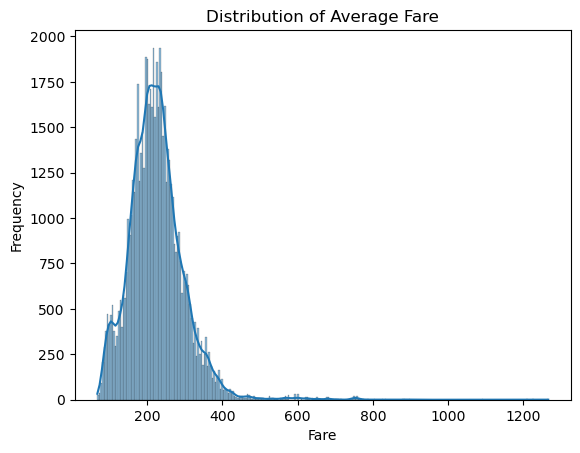

In [16]:
# Checking target distribution
sns.histplot(df['Average_Fare'], kde = True)
plt.title("Distribution of Average Fare")
plt.xlabel("Fare")
plt.ylabel("Frequency")
plt.show()

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 63373 entries, 0 to 1581277
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   MktCoupons               63373 non-null  int64  
 1   OriginCityMarketID       63373 non-null  int64  
 2   DestCityMarketID         63373 non-null  int64  
 3   OriginAirportID          63373 non-null  int64  
 4   DestAirportID            63373 non-null  int64  
 5   Carrier                  63373 non-null  int64  
 6   NonStopMiles             63373 non-null  float64
 7   RoundTrip                63373 non-null  float64
 8   ODPairID                 63373 non-null  int64  
 9   Pax                      63373 non-null  float64
 10  CarrierPax               63373 non-null  float64
 11  Average_Fare             63373 non-null  float64
 12  Market_share             63373 non-null  float64
 13  Market_HHI               63373 non-null  float64
 14  LCC_Comp                 

In [11]:
X = df.drop('Average_Fare', axis = 1)
y = df['Average_Fare']

In [12]:
from sklearn.model_selection import train_test_split
# Data splitting for the ML models
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 42)

# Data splitting for ANN
X_train_nn, X_test_nn, y_train_nn, y_test_nn = train_test_split(X,y,test_size = 0.1, random_state = 42)

In [13]:
print(X_train.shape)
print(X_test.shape)
print(X_train_nn.shape)
print(X_test_nn.shape)

(50698, 25)
(12675, 25)
(57035, 25)
(6338, 25)


In [14]:
# Scaling the training data for NN to mean 0 and standard deviation 1
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_nn = scaler.fit_transform(X_train_nn)
X_test_nn = scaler.transform(X_test_nn)

In [15]:
# Transforming the target variables into log values
y_train_log = np.log1p(y_train_nn)
y_test_log = np.log1p(y_test_nn)

In [16]:
# Building a pipeline for ANN
import tensorflow as tf
from tensorflow.keras import layers, models

def build_ann():  
    model = models.Sequential([
        layers.Dense(128, activation = 'relu', input_shape = (X_train_nn.shape[1],)),
        layers.Dense(64, activation = 'relu'),
        layers.Dense(1)
    ])
    
    model.compile(optimizer = 'adam', loss = 'mse')
    return model

In [17]:
from scikeras.wrappers import KerasRegressor
from sklearn.pipeline import Pipeline

pipeline_ann = Pipeline([
    ('scaler', StandardScaler()),
    ('ann', KerasRegressor(model = build_ann, epochs = 50, batch_size = 32, validation_split = 0.1, verbose = 0))
])

In [18]:
pipeline_ann.fit(X_train_nn, y_train_log)

C:\Users\Priyanuj\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Pipeline(steps=[('scaler', StandardScaler()),
                ('ann',
                 KerasRegressor(batch_size=32, epochs=50, model=<function build_ann at 0x000001BE15225260>, validation_split=0.1, verbose=0))])

In [19]:
# Predicting and inverse transforming the predictions
y_pred_log = pipeline_ann.predict(X_test_nn)
y_pred_ann = np.expm1(y_pred_log) # Reverse log1p

In [20]:
# Evaluating ANN performance
from sklearn.metrics import mean_squared_error, r2_score

rmse_ann = mean_squared_error(y_test_nn, y_pred_ann, squared=False)
r2_ann = r2_score(y_test_nn, y_pred_ann)

print(f"ANN RMSE: {rmse_ann:.2f}")
print(f"ANN R² Score: {r2_ann:.4f}")


ANN RMSE: 22.55
ANN R² Score: 0.9041


C:\Users\Priyanuj\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [42]:
# Building pipeline for the ML algorithms
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

In [154]:
# Pipeline for Random Forest model
pipeline_rf = Pipeline([
    ('model', RandomForestRegressor(
        n_estimators = 100,
        max_depth = None,
        random_state = 42,
        n_jobs = -1
    ))
])

pipeline_rf.fit(X_train, y_train)
y_pred_rf = pipeline_rf.predict(X_test)

In [155]:
# Evaluating Random Forest performance
rmse_rf = mean_squared_error(y_test, y_pred_rf, squared=False)
r2_rf = r2_score(y_test, y_pred_rf)
print(f"ANN RMSE: {rmse_rf:.2f}")
print(f"ANN R² Score: {r2_rf:.4f}")

ANN RMSE: 8.43
ANN R² Score: 0.9877


C:\Users\Priyanuj\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [132]:
# Pipeline for XgBoost model
pipeline_xgb = Pipeline([
    ('model', XGBRegressor(
        n_estimators = 3000,
        learning_rate = 0.1,
        max_depth = 6,
        subsample = 0.8,
        random_state = 42,
        n_jobs = -1
    ))
])

pipeline_xgb.fit(X_train, y_train)
y_pred_xgb = pipeline_xgb.predict(X_test)

In [133]:
# Evaluating XgBoost performance performance
rmse_xgb = mean_squared_error(y_test, y_pred_xgb, squared=False)
r2_xgb = r2_score(y_test, y_pred_xgb)
print(f"ANN RMSE: {rmse_xgb:.2f}")
print(f"ANN R² Score: {r2_xgb:.4f}")

ANN RMSE: 6.71
ANN R² Score: 0.9922


C:\Users\Priyanuj\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [160]:
# Final evaluation of best xgboost model
best_xgb = XGBRegressor(
    n_estimators=3000,         # or set early stopping
    learning_rate=0.1,
    max_depth=6,
    subsample=0.8,
    random_state=42,
    n_jobs=-1
)

best_xgb.fit(X_train, y_train)
y_pred_final = best_xgb.predict(X_test)

from sklearn.metrics import root_mean_squared_error, r2_score, mean_absolute_error

rmse = root_mean_squared_error(y_test, y_pred_final)
r2 = r2_score(y_test, y_pred_final)
mae = mean_absolute_error(y_test, y_pred_final)

print(f"✅ Final XGBoost Evaluation")
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.4f}")
print(f"MAE: {mae:.2f}")

✅ Final XGBoost Evaluation
RMSE: 6.71
R² Score: 0.9922
MAE: 2.43


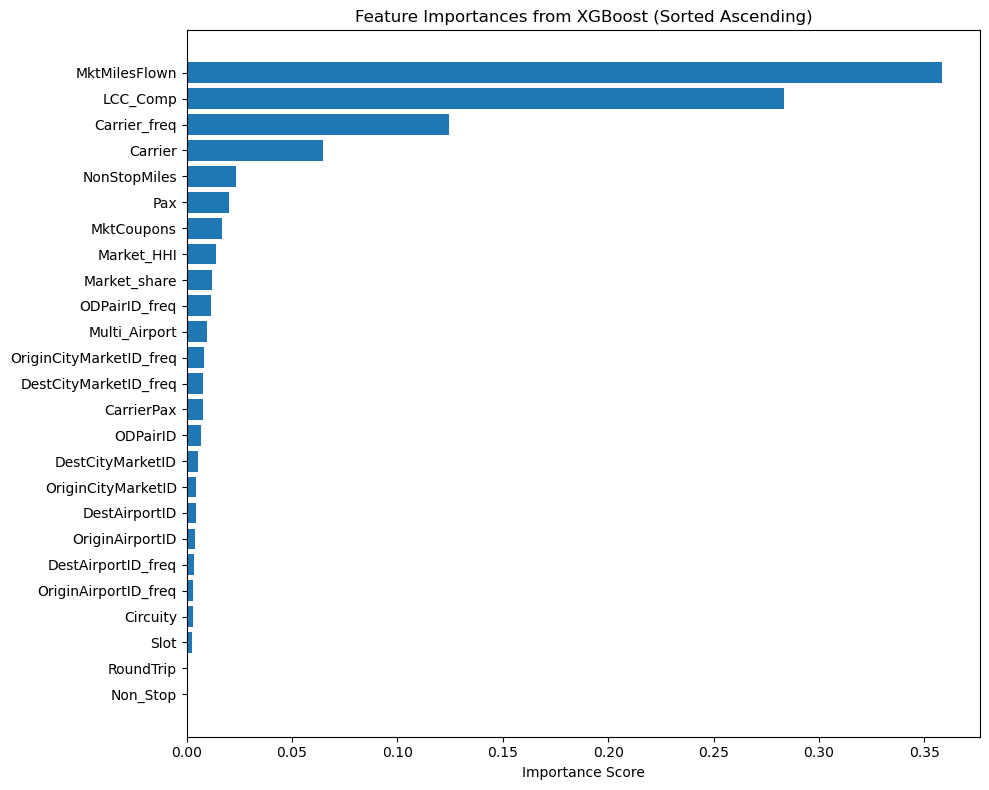

In [164]:
# XgBoost Feature Importance Plot

# Get feature names and importance scores
features = X_train.columns
importances = best_xgb.feature_importances_

# Sort indices based on importance
sorted_idx = np.argsort(importances)

# Sort features and importances accordingly
sorted_features = features[sorted_idx]
sorted_importances = importances[sorted_idx]

# Plot
plt.figure(figsize=(10, 8))
plt.barh(sorted_features, sorted_importances)
plt.title("Feature Importances from XGBoost (Sorted Ascending)")
plt.xlabel("Importance Score")
plt.tight_layout()
plt.show()

### Insights

##### XgBoost model gave the results out of the three models. It gave an R2 score of 0.9922 and RMSE of 6.71
##### Top 10 Most Important Features (XGBoost)

| Rank | Feature             | Description |
|------|---------------------|-------------|
| 1    | **MktMilesFlown**   | Total miles flown between origin and destination markets. Longer routes generally have higher fares. |
| 2    | **LCC_Comp**        | Presence of Low-Cost Carrier competition. More LCCs typically drive fares down. |
| 3    | **Carrier_freq**    | Frequency of the specific carrier’s presence in the dataset. Can reflect market dominance. |
| 4    | **Carrier**         | Encoded ID of the airline operating the flight. Pricing varies significantly across carriers. |
| 5    | **NonStopMiles**    | Distance flown for nonstop flights. Correlates with ticket pricing, especially for direct routes. |
| 6    | **Pax**             | Number of passengers on the route. Higher demand can influence dynamic pricing. |
| 7    | **MktCoupons**      | Number of flight segments or stops in an itinerary. More segments usually indicate a more expensive fare. |
| 8    | **Market_HHI**      | Herfindahl-Hirschman Index — measures market concentration. A higher value implies less competition. |
| 9    | **Market_share**    | Market share of the dominant carrier on the route. Higher share may indicate more pricing power. |
| 10   | **ODPairID_freq**   | Frequency of this origin-destination pair in the dataset. More frequent routes tend to be more competitively priced. |

In [173]:
import joblib
import os
model_path = "C:/Users/Priyanuj/final_xgb_model.pkl"
joblib.dump(best_xgb, model_path)

model_path

'C:/Users/Priyanuj/final_xgb_model.pkl'

#### Retraining the XgBoost model for 10 features as the form created accepts only 10 input features

In [20]:
# Define the top 10 important features
top_features = [
    'MktMilesFlown', 'LCC_Comp', 'Carrier_freq', 'Carrier',
    'NonStopMiles', 'Pax', 'MktCoupons', 'Market_HHI',
    'Market_share', 'ODPairID_freq'
]

# Define X and y
X_top = df[top_features]
y = df['Average_Fare']

In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_top, y, test_size=0.2, random_state=42)

In [41]:
from xgboost import XGBRegressor
xgb_model = XGBRegressor(
    n_estimators=3000,
    learning_rate=0.1,
    max_depth=6,
    subsample=0.8,
    random_state=42,
    n_jobs=-1
)

xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.1, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=3000,
             n_jobs=-1, num_parallel_tree=None, ...)

In [43]:
y_pred_xgb = xgb_model.predict(X_test)
from sklearn.metrics import root_mean_squared_error, r2_score, mean_absolute_error

rmse = root_mean_squared_error(y_test, y_pred_xgb)
r2 = r2_score(y_test, y_pred_xgb)
mae = mean_absolute_error(y_test, y_pred_xgb)

print(f"✅ Final XGBoost Evaluation")
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.4f}")
print(f"MAE: {mae:.2f}")

✅ Final XGBoost Evaluation
RMSE: 5.53
R² Score: 0.9947
MAE: 2.23


In [45]:
import joblib
joblib.dump(xgb_model, "E:/Airline Fare App/model/final_xgb_model_10.pkl")
print("Model saved successfully!")

Model saved successfully!


In [47]:
model = joblib.load("E:/Airline Fare App/model/final_xgb_model_10.pkl")
print(model.n_features_in_)

10
